## importing needed libraries

In [5]:
pip install cred

In [6]:
pip install facebook_scraper

     |████████████████████████████████| 132 kB 8.8 MB/s 
     |████████████████████████████████| 288 kB 34.7 MB/s 
     |████████████████████████████████| 1.8 MB 38.8 MB/s 
     |████████████████████████████████| 2.0 MB 41.1 MB/s 
     |████████████████████████████████| 83 kB 2.6 MB/s 
     |████████████████████████████████| 138 kB 50.6 MB/s 
     |████████████████████████████████| 103 kB 33.7 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 3.6 MB 42.1 MB/s 
     |████████████████████████████████| 127 kB 49.0 MB/s 
  Created wheel for browser-cookie3: filename=browser_cookie3-0.13.0-py3-none-any.whl size=8002 sha256=0786979a9f67f3e9d9d3811f09ab034012c795f68762af247f06013cf0e1f703
  Stored in directory: /root/.cache/pip/wheels/b6/c3/49/b4b8995fe98bce9592770ed77dfb8e1e22c0174348626053da
  Created wheel for demjson3: filename=demjson3-3.0.5-py3-none-any.whl size=76070 sha256=8662b6242d556331cda8c16ecb2e5096a676750c2bce85fc8ade3eb68cfdc

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pickle

import cred
from facebook_scraper import *
import pandas as pd
import tensorflow
from google.colab import files
import pickle
# -*- coding: utf-8 -*-
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

# Testing on random user by entering userid at runtime

## taking input as userid to predict trustworthiness of user

In [8]:
inputuserid = input("Enter twitter userid of user= ")

Enter twitter userid of user= raj_bhuva24


In [9]:
username = input("Enter username to get user posts= ")

Enter username to get user posts= raj.bhuva.336


## extracting user's profile data  and performing prediction on user profile 

In [12]:
consumer_key = "uI8rlEbmxT108GTsVH4OX0SQi" 
consumer_secret = "mn5GPEYvyZE0NoZ6lV1GEB6iszs1R9PXsfxZLGPvVcyhm44FOb"
access_key = "1433079307811766278-X5jzunomTlbMVX4Fxvul7nkLacKqyN"
access_secret = "c6QWgpx34jce0QiVkVsrBF1cDJ6JyS3vqVm4AyO7od3H1"

# Twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)   
auth.set_access_token(access_key, access_secret) 
  
# Creating an API object 
api = tweepy.API(auth)

arcgishub_tweets = []
def profile_Analysis():
    info = {}

    new_tweets = tweepy.Cursor(api.user_timeline, screen_name=inputuserid, tweet_mode='extended').items()
    
    for tweet in new_tweets:
        arcgishub_tweets.append(tweet._json) 
    
    if(len(arcgishub_tweets) == 0):
        profile_score = 0
        return profile_score
    
    user = arcgishub_tweets[0]
    
    dic = user['user']
    dic.pop('entities')
    info[inputuserid] = dic

    inpdf = pd.DataFrame(info)

    inpdf = inpdf.transpose()

    inpdf = inpdf[['protected',
     'followers_count',
     'friends_count',
     'listed_count',
     'created_at',
     'favourites_count',
     'geo_enabled',
     'verified',
     'statuses_count',
     'contributors_enabled',
     'has_extended_profile',
     'default_profile']]

    temp = inpdf['created_at']
    templist = []

    for i in inpdf['created_at']:
    
        templist.append(int(2021) - int(i.split()[5]))

    inpdf['created_at'] = templist


    inpdf = inpdf.replace({
        True: 1,
        False: 0,
    })


    loaded_model = pickle.load(open('/content/drive/MyDrive/finalized_model.sav', 'rb'))

    profile_score = loaded_model.predict(inpdf)
    return profile_score
    
profile_score = profile_Analysis()
print("User trustworthiness scores from user profile: ",profile_score)

User trustworthiness scores from user profile:  [1]


## performing text classification for positive, negative or nutral score of tweets and bio descriptions and predicting from user's textual content

******Word Cloud Visulization of textual content and relativity with graph*****


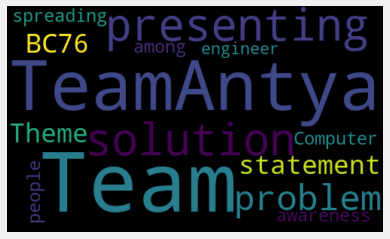


*****Plotting Overall Sentiment Analysis of textual content*****


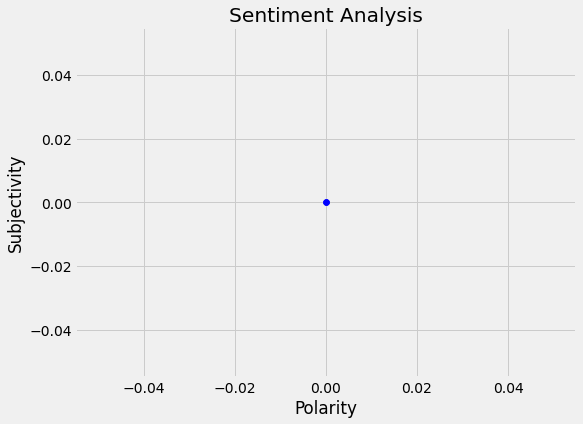

Total Percentage of Positive textual content of user =  0.0
Total Percentage of Negative textual content of user =  0.0
Total value counts: 
Neutral    2
Name: Analysis, dtype: int64


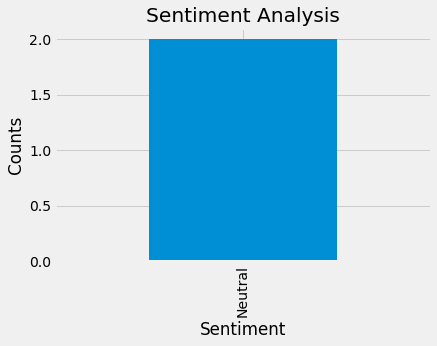

raj_bhuva24  classification score based on textual content is  0.0


In [13]:
data1 = [[arcgishub_tweets[0]['user']['description']]]

df2 = pd.DataFrame(data1,columns = ['Tweets'])

posts = api.user_timeline(screen_name=inputuserid, count = 100, lang ="en", tweet_mode="extended")

df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df = df.append(df2,ignore_index = True)

def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)


def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'

print("******Word Cloud Visulization of textual content and relativity with graph*****")

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#print("*********Subjectivity, polarity and Analysis of textual content*********")
preds = float(profile_score)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
#print(df)

print()

print("*****Plotting Overall Sentiment Analysis of textual content*****")


plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

positivecount = round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)
print('Total Percentage of Positive textual content of user = ', positivecount)


ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

negativecount = round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


print('Total Percentage of Negative textual content of user = ', negativecount)

print("Total value counts: ")
print(df['Analysis'].value_counts())


plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

print(inputuserid," classification score based on textual content is ", positivecount/100,end='\n')

**Fatching user's facebook posts and visual content for Sentiment Image Exploration**

In [14]:
df1 = get_profile(username,cookies= "/content/drive/MyDrive/cookues.txt")
#raj.bhuva.336

df = pd.DataFrame.from_dict(df1,orient ='index',columns=None)

df =  df.drop(['profile_picture','id'])

df11 = []

i=0

for post in get_posts(username, pages=2,credentials = ('wikef59426@busantei.com','Rohan@1234')):
    df11.append(post)
    time.sleep(5)
    #print(i)
    i+=1

dfnew = pd.DataFrame(df11)

posts_list = list(dfnew['image'])
#print(posts_list)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()           
drive = GoogleDrive(gauth)

from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
import requests
import urllib.request
from PIL import Image


file_name = 0
pathupload = "/content/drive/MyDrive/image_predict"
for url in posts_list:
  file_name+=1
  file_name = str(file_name)
  if url ==None:
    break
  else:
    urllib.request.urlretrieve(url,file_name+'.jpeg')
    
    img = Image.open(file_name+'.jpeg')
    #print(type(img))
    img.save(pathupload +'//' +  file_name+'.jpeg')
    # img.show()
    file_name = int(file_name)
#     file_url.save(pathupload +'//' +  file, "JPEG")


from keras.models import model_from_json
# load json and create model
file = open('/content/drive/MyDrive/newmodel.json', 'r')
model_json = file.read()
file.close()
loaded_model = model_from_json(model_json) 
# load weights
loaded_model.load_weights('/content/drive/MyDrive/newfile.hdf5')
#print("sucess")



import os

path1 = "/content/drive/MyDrive/image_predict"
path2 = "/content/drive/MyDrive/image_predict_resize"

img_rows, img_cols = 300, 300

listing = os.listdir(path1) 
num_samples=size(listing)

for file in listing:
    im = Image.open(path1 + '//' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here   
 #   print(file)        
    gray.save(path2 +'//' +  file, "JPEG")

imlist = os.listdir(path2)

im1 = array(Image.open('/content/drive/MyDrive/image_predict_resize' + '//'+ imlist[0]))
m,n = im1.shape[0:2]
imnbr = len(imlist)

immatrix = array([array(Image.open('/content/drive/MyDrive/image_predict_resize' + '//'+ im2)).flatten() for im2 in imlist],'f')
#img=immatrix.reshape(img_rows,img_cols)

#img=immatrix.reshape(img_rows,img_cols)

img = immatrix.reshape(immatrix.shape[0], 1, img_rows, img_cols)
#ptest = immatrix[3].reshape(immatrix, 1, img_rows, img_cols)
img = img.astype('float32')

img /= 255

score = loaded_model.predict(img)

#print(score)

y_pred = list(np.argmax(score, axis=1))
#print(y_pred)

imgavgscore = (sum(y_pred) / len(y_pred)) / 2
print("Average score of image sentiment Analysis: ",round(imgavgscore, 2))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: A low page limit (<=2) might return no results, try increasing the limit
  exec(code_obj, self.user_global_ns, self.user_ns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Average score of image sentiment Analysis:  0.77


# Final output with Trustworthiness scores

#### here 1.0 means user is trustworthy and 0.0 means user is not trustworthy

In [16]:
avgscore = (profile_score + (positivecount/100) + imgavgscore)/ 3 

print(inputuserid,"is trustworthy from user's profile is ",preds,end='\n')
print(inputuserid," classification score based on textual content is ", positivecount/100,end='\n')
print(inputuserid," sentiment score based on visual content and posts is ", round(imgavgscore, 2),end='\n')
print()

percentage = avgscore*100
print("Probability that ",inputuserid, "is trustworthee is",percentage,'%')

raj_bhuva24 is trustworthy from user's profile is  1.0
raj_bhuva24  classification score based on textual content is  0.0
raj_bhuva24  sentiment score based on visual content and posts is  0.77

Probability that  raj_bhuva24 is trustworthee is [58.97435897] %
